In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import scipy.stats.stats as stats
from sklearn.metrics import mean_squared_error

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# check if a gpu is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
df = pd.read_csv('track_features_final.csv', index_col=0)

In [8]:
meta = pd.read_csv('meta_final.csv', index_col = 0)
meta.rename(columns={'Track ID': 'track_id'}, inplace=True)
tracks = df.merge(meta, on='track_id', how='left')

In [9]:
tracks.head()

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,...,mfccs_mean15,mfccs_var15,mfccs_mean16,mfccs_var16,mfccs_mean17,mfccs_var17,mfccs_mean18,mfccs_var18,mfccs_mean19,mfccs_var19
0,2,Food,AWOL,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,...,1.253358,49.994880,-8.481487,53.345783,-2.040749,52.196274,-2.946624,51.77792,0.094077,40.441700
1,5,This World,AWOL,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,...,0.919858,66.263405,-4.126342,44.906055,-0.580666,44.026913,-1.600445,65.26340,1.350323,64.534930
2,10,Freeway,Kurt Vile,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,...,-0.911099,42.735588,-3.207996,32.780640,3.043154,40.873420,-1.036512,30.22485,3.882601,29.444992
3,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,Folk,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,...,1.239001,43.232227,-5.205992,38.285038,-0.754437,39.603607,-6.319377,47.34824,-1.172379,44.371730
4,141,Ohio,Alec K. Redfearn & the Eyesores,Folk,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,...,5.053833,99.240820,-0.170090,91.179344,3.087437,62.452350,-8.665928,70.66697,-1.098168,89.260025


In [10]:
tracks.dropna(inplace=True)

In [11]:
cols = ['zero_crossings', 'tempo_y', 'spec_cent_mean',
       'spec_cent_var', 'spectral_rolloff_mean', 'spectral_rolloff_var',
       'chroma_mean0', 'chroma_var0', 'chroma_mean1', 'chroma_var1',
       'chroma_mean2', 'chroma_var2', 'chroma_mean3', 'chroma_var3',
       'chroma_mean4', 'chroma_var4', 'chroma_mean5', 'chroma_var5',
       'chroma_mean6', 'chroma_var6', 'chroma_mean7', 'chroma_var7',
       'chroma_mean8', 'chroma_var8', 'chroma_mean9', 'chroma_var9',
       'chroma_mean10', 'chroma_var10', 'chroma_mean11', 'chroma_var11',
       'harm_mean', 'perc_mean', 'harm_var', 'perc_var', 'mfccs_mean0',
       'mfccs_var0', 'mfccs_mean1', 'mfccs_var1', 'mfccs_mean2', 'mfccs_var2',
       'mfccs_mean3', 'mfccs_var3', 'mfccs_mean4', 'mfccs_var4', 'mfccs_mean5',
       'mfccs_var5', 'mfccs_mean6', 'mfccs_var6', 'mfccs_mean7', 'mfccs_var7',
       'mfccs_mean8', 'mfccs_var8', 'mfccs_mean9', 'mfccs_var9',
       'mfccs_mean10', 'mfccs_var10', 'mfccs_mean11', 'mfccs_var11',
       'mfccs_mean12', 'mfccs_var12', 'mfccs_mean13', 'mfccs_var13',
       'mfccs_mean14', 'mfccs_var14', 'mfccs_mean15', 'mfccs_var15',
       'mfccs_mean16', 'mfccs_var16', 'mfccs_mean17', 'mfccs_var17',
       'mfccs_mean18', 'mfccs_var18', 'mfccs_mean19', 'mfccs_var19']

In [12]:
tracks.genre.value_counts()

Folk             587
Rock             535
Instrumental     456
Pop              445
Hip-Hop          406
Electronic       380
International    301
Experimental     171
Name: genre, dtype: int64

In [13]:
# list of features with a low VIF
feat_cols= ['spectral_rolloff_mean',
     'mfccs_mean7',
     'mfccs_mean8',
     'mfccs_mean9',
     'chroma_mean1',
     'chroma_mean4',
     'chroma_mean10',
     'mfccs_mean10',
     'mfccs_mean4',
     'mfccs_mean0',
     'spec_cent_var',
     'mfccs_var7',
     'mfccs_var18',
     'zero_crossings',
     'mfccs_mean2',
     'mfccs_mean1',
     'mfccs_var6']

In [14]:
# oversample the data and split it into train and test
X = tracks[feat_cols]
y = tracks['genre']
 
converter = LabelEncoder()
converter.fit(y)
y = converter.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample = SMOTE()
X_train, y_train = sample.fit_resample(X_train, y_train)
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([469, 469, 469, 469, 469, 469, 469, 469], dtype=int64))


# Logistic Regression

In [15]:
param_grid = {'C' : np.logspace(-4, 4, 20),
              'solver' : ['newton-cg', 'lbfgs'],}

In [16]:
lr = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [17]:
lr.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\vijal\.conda\envs\gputest\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\vijal\.conda\envs\gputest\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\vijal\.conda\envs\gputest\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['newton-cg', 'lbfgs']},
             verbose=True)

In [18]:
lr.best_params_

{'C': 78.47599703514607, 'solver': 'newton-cg'}

In [19]:
lr_pred_train = lr.predict(X_train)

In [20]:
print(classification_report(y_train, lr_pred_train))
print(metrics.confusion_matrix(y_train, lr_pred_train))

              precision    recall  f1-score   support

           0       0.32      0.34      0.33       469
           1       0.26      0.11      0.15       469
           2       0.46      0.46      0.46       469
           3       0.52      0.59      0.55       469
           4       0.49      0.61      0.54       469
           5       0.41      0.41      0.41       469
           6       0.33      0.21      0.26       469
           7       0.46      0.68      0.55       469

    accuracy                           0.43      3752
   macro avg       0.41      0.43      0.41      3752
weighted avg       0.41      0.43      0.41      3752

[[161  19  15 115  70  32  12  45]
 [ 58  51  61  25  80  69  33  92]
 [ 18  23 218   9  80  43  45  33]
 [ 74  22  11 277   9  15  24  37]
 [ 36  14  55   7 288  27   6  36]
 [ 53  35  42  44  28 192  50  25]
 [ 76  20  57  38  16  62  98 102]
 [ 25  13  20  22  20  23  27 319]]


In [21]:
lr_pred_test = lr.predict(X_test)

In [22]:
print(classification_report(y_test, lr_pred_test))
print(metrics.confusion_matrix(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42        75
           1       0.06      0.07      0.07        29
           2       0.59      0.48      0.53       118
           3       0.46      0.51      0.48        87
           4       0.51      0.51      0.51        81
           5       0.32      0.40      0.35        65
           6       0.33      0.17      0.23        87
           7       0.57      0.65      0.61       115

    accuracy                           0.45       657
   macro avg       0.40      0.41      0.40       657
weighted avg       0.45      0.45      0.44       657

[[35  0  3 18  4  4  4  7]
 [ 2  2  7  2  5  4  2  5]
 [ 6  5 57  3 18 14  8  7]
 [19  7  1 44  1  4  5  6]
 [ 3  3  8  6 41  8  4  8]
 [11  5  3  8  2 26  6  4]
 [10  3 12  9  5 13 15 20]
 [ 7  6  6  6  4  9  2 75]]


# KNN

In [44]:
# oversample the data and split it into train and test
X = tracks[cols]
y = tracks['genre']
 
converter = LabelEncoder()
converter.fit(y)
y = converter.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample = SMOTE()
X_train, y_train = sample.fit_resample(X_train, y_train)
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([469, 469, 469, 469, 469, 469, 469, 469], dtype=int64))


In [45]:
# scale the train and test sets using the min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# calculate the error for 40 iterations of KNN
errors = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))

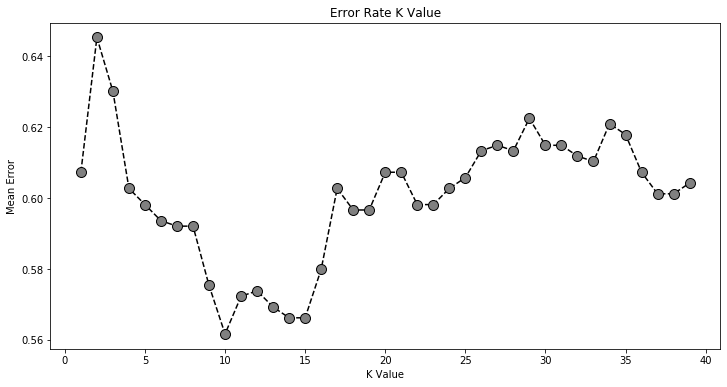

In [47]:
# plot the error against the k-value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40)
         , errors
         , color='black'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='grey'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [48]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
knn_pred_train = classifier.predict(X_train)

In [50]:
print(classification_report(y_train, knn_pred_train))
print(confusion_matrix(y_train, knn_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       469
           1       0.67      0.86      0.75       469
           2       0.71      0.54      0.61       469
           3       0.61      0.81      0.70       469
           4       0.81      0.58      0.68       469
           5       0.55      0.78      0.64       469
           6       0.55      0.45      0.49       469
           7       0.75      0.58      0.66       469

    accuracy                           0.65      3752
   macro avg       0.67      0.65      0.65      3752
weighted avg       0.67      0.65      0.65      3752

[[295  21  10  70  13  32  20   8]
 [  8 403   4  15   2  17   8  12]
 [  9  38 254   7  26  73  46  16]
 [ 44   5   1 381   3  20  10   5]
 [ 15  48  44  24 273  34  19  12]
 [  9  17   5  47   3 364  18   6]
 [ 20  38  29  54   7  81 209  31]
 [ 22  35  11  26   9  46  47 273]]


In [52]:
knn_pred_test = classifier.predict(X_test)

In [53]:
print(classification_report(y_test, knn_pred_test))
print(confusion_matrix(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.35      0.32      0.34        75
           1       0.14      0.28      0.18        29
           2       0.59      0.46      0.51       118
           3       0.57      0.71      0.63        87
           4       0.63      0.38      0.48        81
           5       0.30      0.60      0.40        65
           6       0.28      0.22      0.24        87
           7       0.65      0.44      0.53       115

    accuracy                           0.44       657
   macro avg       0.44      0.43      0.41       657
weighted avg       0.48      0.44      0.44       657

[[24  3  5 19  2  7  8  7]
 [ 3  8  3  1  1  7  3  3]
 [ 1 12 54  2  7 29 12  1]
 [13  1  0 62  0  6  3  2]
 [ 6  3 16  3 31 11  7  4]
 [ 5  8  3  5  1 39  2  2]
 [ 7 11  7 12  5 17 19  9]
 [ 9 13  4  5  2 16 15 51]]


# Random Forests

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# oversample the data and split it into train and test
X = tracks[cols]
y = tracks['genre']
 
converter = LabelEncoder()
converter.fit(y)
y = converter.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample = SMOTE()
X_train, y_train = sample.fit_resample(X_train, y_train)
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([469, 469, 469, 469, 469, 469, 469, 469], dtype=int64))


In [ ]:
rf_params = {
    'n_estimators': [200,400,600],
    'max_depth': [2,4,6,8],
    'max_features' : [15,25,35],
    
}

In [56]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [100, 200, 300],
    'max_features' : [40, 50 , 60],
    
}

rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 100, 'max_features': 40, 'n_estimators': 300}

In [57]:
rf_pred_train = rf.predict(X_train)

In [58]:
print(classification_report(y_train, lr_pred_train))
print(metrics.confusion_matrix(y_train, lr_pred_train))

              precision    recall  f1-score   support

           0       0.34      0.38      0.36       469
           1       0.23      0.11      0.15       469
           2       0.46      0.46      0.46       469
           3       0.50      0.59      0.54       469
           4       0.49      0.60      0.54       469
           5       0.43      0.43      0.43       469
           6       0.33      0.19      0.24       469
           7       0.46      0.69      0.55       469

    accuracy                           0.43      3752
   macro avg       0.41      0.43      0.41      3752
weighted avg       0.41      0.43      0.41      3752

[[177  23  12 110  62  31  17  37]
 [ 66  50  67  25  65  63  27 106]
 [ 19  27 218   8  79  43  39  36]
 [ 78  23  12 276  11  15  22  32]
 [ 38  18  56  11 280  24   7  35]
 [ 46  41  32  54  30 200  40  26]
 [ 70  22  57  45  21  64  88 102]
 [ 25  12  19  22  22  22  25 322]]


In [61]:
rf_pred_test = rf.predict(X_test)

In [62]:
print(classification_report(y_test, rf_pred_test))
print(metrics.confusion_matrix(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.47      0.44      0.46        75
           1       0.30      0.24      0.27        29
           2       0.62      0.69      0.66       118
           3       0.66      0.75      0.70        87
           4       0.63      0.51      0.56        81
           5       0.47      0.55      0.51        65
           6       0.35      0.33      0.34        87
           7       0.66      0.63      0.64       115

    accuracy                           0.56       657
   macro avg       0.52      0.52      0.52       657
weighted avg       0.55      0.56      0.55       657

[[33  2  1 13  5  4  9  8]
 [ 2  7  4  1  4  3  3  5]
 [ 1  1 82  2 10  8 14  0]
 [13  0  0 65  1  4  2  2]
 [ 5  3 14  1 41  7  5  5]
 [ 4  0  5  7  1 36 10  2]
 [ 7  5 17  5  2  7 29 15]
 [ 5  5  9  4  1  8 11 72]]


In [63]:
rf_params = {
    'n_estimators': [200,400,600],
    'max_depth': [2,4,6,8,50,100,150],
    'max_features' : [15,25,35,45],
    
}
rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


{'max_depth': 150, 'max_features': 25, 'n_estimators': 400}

In [64]:
rf_pred_train = rf.predict(X_train)

In [65]:
print(classification_report(y_train, lr_pred_train))
print(metrics.confusion_matrix(y_train, lr_pred_train))

              precision    recall  f1-score   support

           0       0.34      0.38      0.36       469
           1       0.23      0.11      0.15       469
           2       0.46      0.46      0.46       469
           3       0.50      0.59      0.54       469
           4       0.49      0.60      0.54       469
           5       0.43      0.43      0.43       469
           6       0.33      0.19      0.24       469
           7       0.46      0.69      0.55       469

    accuracy                           0.43      3752
   macro avg       0.41      0.43      0.41      3752
weighted avg       0.41      0.43      0.41      3752

[[177  23  12 110  62  31  17  37]
 [ 66  50  67  25  65  63  27 106]
 [ 19  27 218   8  79  43  39  36]
 [ 78  23  12 276  11  15  22  32]
 [ 38  18  56  11 280  24   7  35]
 [ 46  41  32  54  30 200  40  26]
 [ 70  22  57  45  21  64  88 102]
 [ 25  12  19  22  22  22  25 322]]


In [66]:
rf_pred_test = rf.predict(X_test)

In [68]:
print(classification_report(converter.inverse_transform(y_test), converter.inverse_transform(rf_pred_test)))
print(metrics.confusion_matrix(y_test, rf_pred_test))

               precision    recall  f1-score   support

   Electronic       0.44      0.41      0.43        75
 Experimental       0.39      0.31      0.35        29
         Folk       0.64      0.69      0.67       118
      Hip-Hop       0.64      0.72      0.68        87
 Instrumental       0.60      0.51      0.55        81
International       0.49      0.55      0.52        65
          Pop       0.41      0.38      0.39        87
         Rock       0.65      0.65      0.65       115

     accuracy                           0.56       657
    macro avg       0.53      0.53      0.53       657
 weighted avg       0.56      0.56      0.56       657

[[31  2  2 16  5  2  9  8]
 [ 1  9  4  1  6  2  3  3]
 [ 1  0 82  2 10 10 12  1]
 [15  1  1 63  1  3  1  2]
 [ 5  4 12  1 41  7  6  5]
 [ 6  0  3  6  1 36  9  4]
 [ 4  3 16  6  2  6 33 17]
 [ 7  4  8  3  2  8  8 75]]


# Neural Network

In [12]:
# oversample the data and split it into train and test
X = tracks[cols]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['genre']
 
converter = LabelEncoder()
converter.fit(y)
y = converter.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sample = SMOTE()
X_train, y_train = sample.fit_resample(X_train, y_train)
print(np.unique(y_train, return_counts=True))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([469, 469, 469, 469, 469, 469, 469, 469], dtype=int64))


In [49]:
# clear any previous tensorflow sessions
tf.keras.backend.clear_session()

In [50]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
#     tf.keras.layers.Dense(32, activation='relu'),
#     #tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(8, activation='softmax'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [51]:
# create a callback to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00002)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='accuracy')

In [53]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=64, callbacks=[callback])

Epoch 1/600
15/15 [==============================] - 0s 16ms/step - loss: 2.1116 - accuracy: 0.1189 - val_loss: 2.0752 - val_accuracy: 0.1202
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 2.0974 - accuracy: 0.1282 - val_loss: 2.0628 - val_accuracy: 0.1507
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 2.0862 - accuracy: 0.1410 - val_loss: 2.0511 - val_accuracy: 0.1796
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 2.0722 - accuracy: 0.1503 - val_loss: 2.0405 - val_accuracy: 0.2085
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 2.0526 - accuracy: 0.1631 - val_loss: 2.0298 - val_accuracy: 0.2374
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 2.0450 - accuracy: 0.1714 - val_loss: 2.0193 - val_accuracy: 0.2481
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 2.0350 - accuracy: 0.1839 - val_loss: 2.0080 - val_accuracy: 0.2755
Epoch 8/600


In [54]:
pred = model.predict(X_test)

In [64]:
print(classification_report(converter.inverse_transform(np.argmax(y_test, axis=1)), converter.inverse_transform(np.argmax(pred, axis=1))))

               precision    recall  f1-score   support

   Electronic       0.38      0.45      0.41        75
 Experimental       0.11      0.14      0.12        29
         Folk       0.64      0.65      0.64       118
      Hip-Hop       0.60      0.62      0.61        87
 Instrumental       0.59      0.54      0.57        81
International       0.42      0.49      0.45        65
          Pop       0.44      0.28      0.34        87
         Rock       0.60      0.59      0.60       115

     accuracy                           0.51       657
    macro avg       0.47      0.47      0.47       657
 weighted avg       0.52      0.51      0.51       657



In [66]:
print(confusion_matrix(converter.inverse_transform(np.argmax(y_test, axis=1)), converter.inverse_transform(np.argmax(pred, axis=1))))

[[34  4  2 14  6  3  4  8]
 [ 2  4  8  2  5  4  0  4]
 [ 2  6 77  2  9 13  8  1]
 [19  3  1 54  0  5  2  3]
 [11  6  9  0 44  7  1  3]
 [ 8  2  5  8  1 32  4  5]
 [ 6  6 11  6  6  7 24 21]
 [ 8  7  8  4  3  6 11 68]]
